In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import scipy
from scipy import stats
from scipy.stats import norm
import statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import pylab as py

import plotly.express as px

pd.set_option('display.float_format', lambda x: '%.3f' % x)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics

In [4]:
df = pd.read_csv("/content/Cleaned_GapMinder.csv")
df.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,oilperperson,country,countrycode
0,8740.966,0.030,0.570,26.800,75944000.000,25.600,1.935,3.654,49.624,0.000,1173.179,6.684,55.700,24.040,1.484,Afghanistan,AFG
1,1914.997,7.290,1.025,57.400,223747333.333,42.100,1.935,44.990,76.918,9.000,636.341,7.699,51.400,46.720,1.484,Albania,ALB
2,2231.993,0.690,2.307,23.500,2932108666.667,31.700,0.100,12.500,73.131,2.000,590.510,4.849,50.500,65.220,0.420,Algeria,DZA
3,20423.174,10.170,1.444,37.403,5033261621.667,47.549,1.935,81.000,69.754,3.689,1173.179,5.362,58.636,88.920,1.484,Andorra,AND
4,1381.004,5.570,1.461,23.100,248358000.000,69.400,2.000,10.000,51.093,-2.000,172.999,14.555,75.700,56.700,1.484,Angola,AGO


## Convert the response variable to binary

In [7]:
binarydata = df.copy()

def internetgrp(row):
    if row['internetuserate'] < df['internetuserate'].median():
        return 0
    else:
        return 1

binarydata['internetuserate'] = binarydata.apply (lambda row: internetgrp(row),axis=1)

In [8]:
binarydata.shape

(213, 17)

In [9]:
binarydata.describe()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,oilperperson
count,213.000,213.000,213.000,213.000,213.000,213.000,213.000,213.000,213.000,213.000,213.000,213.000,213.000,213.000,213.000
mean,6610.648,6.669,1.211,36.494,1587879863.451,47.471,1.365,0.526,69.799,3.694,984.374,9.344,58.592,56.769,1.484
std,6933.041,4.526,0.751,18.275,2211029532.989,12.437,1.267,0.501,9.087,5.474,650.163,5.074,9.277,23.276,0.987
min,103.776,0.030,0.000,3.900,132000.000,20.350,0.060,0.000,49.624,-9.500,0.000,0.201,38.200,10.400,0.032
25%,952.827,3.230,0.570,23.100,37950000.000,40.300,0.200,0.000,65.493,1.000,431.625,5.633,53.500,37.340,1.484
50%,3665.348,6.689,1.212,35.000,234864666.667,47.549,1.200,1.000,72.231,3.689,1173.179,9.508,58.636,56.769,1.484
75%,8740.966,9.500,1.444,44.300,2421917666.667,53.600,1.935,1.000,76.072,8.000,1173.179,11.980,63.700,73.500,1.484
max,20423.174,18.905,2.756,76.100,5997869166.667,73.550,4.539,1.000,83.394,10.000,2285.509,21.501,79.000,100.000,12.229


## Split into training and testing sets

In [10]:
predictors = binarydata[['incomeperperson','employrate','femaleemployrate','polityscore']]

targets = binarydata.internetuserate

pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

print ('Training sample')
print (pred_train.shape)
print ('')
print ('Testing sample')
print (pred_test.shape)
print ('')
print ('Training sample')
print (tar_train.shape)
print ('')
print ('Testing sample')
print (tar_test.shape)

Training sample
(127, 4)

Testing sample
(86, 4)

Training sample
(127,)

Testing sample
(86,)


## Model Building

In [11]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(pred_train,tar_train)

predictions = classifier.predict(pred_test)

## Display the confusion matrix

In [12]:
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[30, 12],
       [ 6, 38]])

## Display the accuracy score

In [13]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.7906976744186046

## Display the decision tree

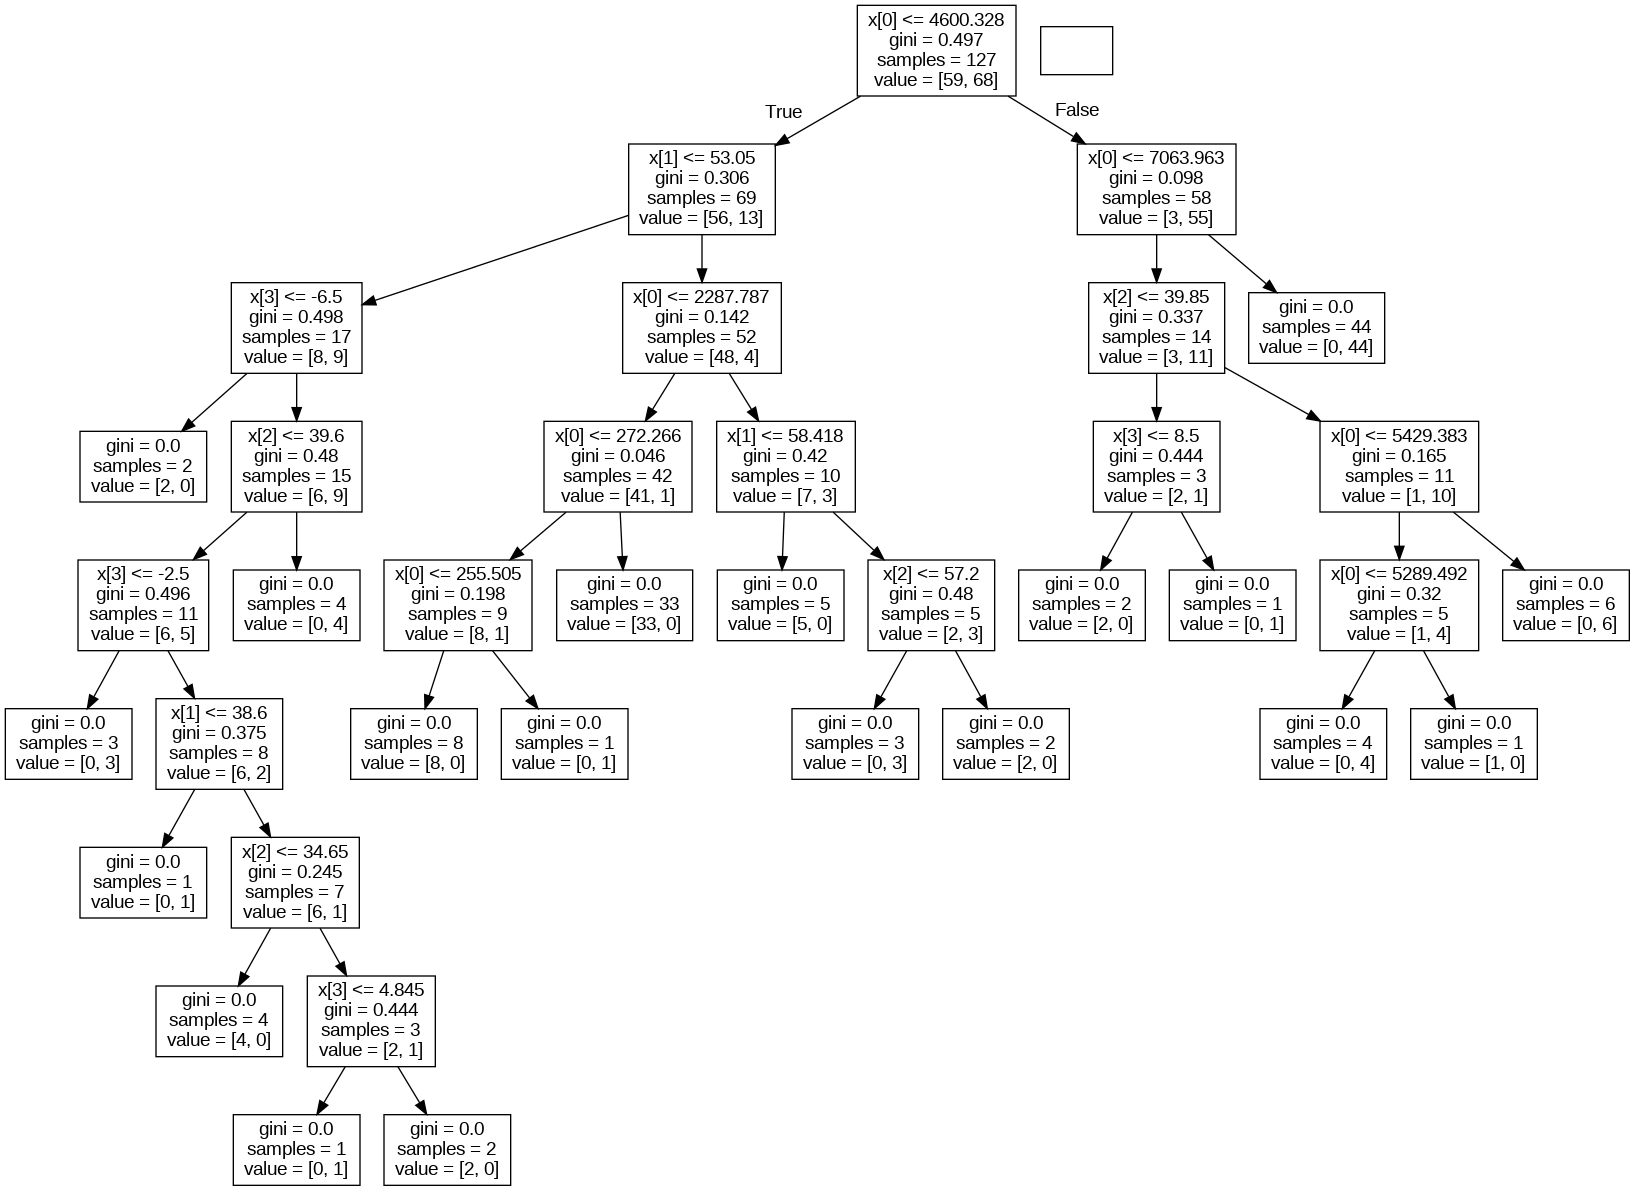

In [14]:
from sklearn import tree
from io import StringIO
from IPython.display import Image
out = StringIO()
tree.export_graphviz(classifier, out_file=out)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

The decision tree analysis was performed to test non-linear relationships among the explanatory variables and a single binary, categorical response variable. The training sample has 127 rows of data and 4 explanatory variables; the testing sample has 86 rows of data, and the same 4 explanatory variables. The accuracy score is 79.1%, meaning that the model accurately predicted 79.1% of the internet use rates per country.

## Running a Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

classifier_r=RandomForestClassifier(n_estimators=25)
classifier_r=classifier_r.fit(pred_train,tar_train)
predictions_r=classifier_r.predict(pred_test)

## Confusion Matrix

In [16]:
sklearn.metrics.confusion_matrix(tar_test,predictions_r)

array([[34,  8],
       [ 6, 38]])

## Accuracy Score

In [17]:
sklearn.metrics.accuracy_score(tar_test, predictions_r)

0.8372093023255814

## Fit an Extra Trees model to the data

In [21]:
model_r = ExtraTreesClassifier()
model_r.fit(pred_train,tar_train)

ExtraTreesClassifier()

In [22]:
model_r.feature_importances_

array([0.58895213, 0.16419808, 0.12709768, 0.11975211])

## Run a different number of trees and see the effect of that on the accuracy of the prediction

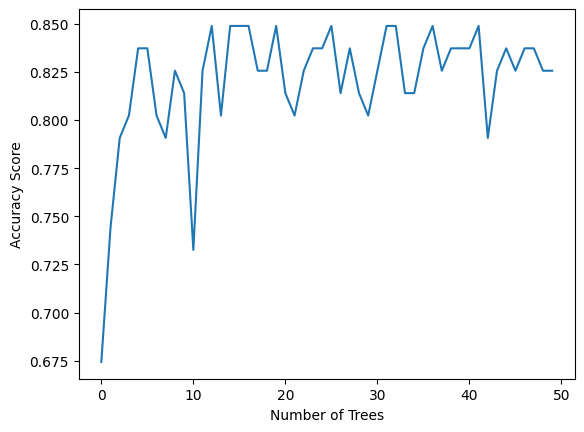

In [23]:
trees=range(50)
accuracy=np.zeros(50)

for idx in range(len(trees)):
    classifier_r=RandomForestClassifier(n_estimators=idx + 1)
    classifier_r=classifier_r.fit(pred_train,tar_train)
    predictions_r=classifier_r.predict(pred_test)
    accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions_r)

plt.cla()
plt.plot(trees, accuracy)
plt.ylabel('Accuracy Score')
plt.xlabel('Number of Trees')
plt.show()

## Running a Lasso Regression Analysis

### Select predictor variables and target variable as separate data sets

In [24]:
predvar = df[['incomeperperson','employrate','femaleemployrate','polityscore',
                      'alcconsumption', 'lifeexpectancy', 'oilperperson',
                      'relectricperperson', 'urbanrate']]
target = df.internetuserate

### Standardize predictors to have mean = 0 and standard deviation = 1

In [25]:
predictors=predvar.copy()
from sklearn import preprocessing
predictors['incomeperperson']=preprocessing.scale(predictors['incomeperperson'].astype('float64'))
predictors['employrate']=preprocessing.scale(predictors['employrate'].astype('float64'))
predictors['femaleemployrate']=preprocessing.scale(predictors['femaleemployrate'].astype('float64'))
predictors['polityscore']=preprocessing.scale(predictors['polityscore'].astype('float64'))
predictors['alcconsumption']=preprocessing.scale(predictors['alcconsumption'].astype('float64'))
predictors['lifeexpectancy']=preprocessing.scale(predictors['lifeexpectancy'].astype('float64'))
predictors['oilperperson']=preprocessing.scale(predictors['oilperperson'].astype('float64'))
predictors['relectricperperson']=preprocessing.scale(predictors['relectricperperson'].astype('float64'))
predictors['urbanrate']=preprocessing.scale(predictors['urbanrate'].astype('float64'))

### Split data into train and test sets

In [26]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, test_size=.3, random_state=123)

### Specify the lasso regression model

In [28]:
from sklearn.linear_model import LassoLarsCV

model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

### Print the regression coefficients

In [29]:
dict(zip(predictors.columns, model.coef_))

{'incomeperperson': 14.386367121983518,
 'employrate': 0.0,
 'femaleemployrate': 0.0,
 'polityscore': 0.0,
 'alcconsumption': 7.307480503074373,
 'lifeexpectancy': 5.20454325062642,
 'oilperperson': 0.0,
 'relectricperperson': 1.8647842966263088,
 'urbanrate': 0.0}

### Plot coefficient progression

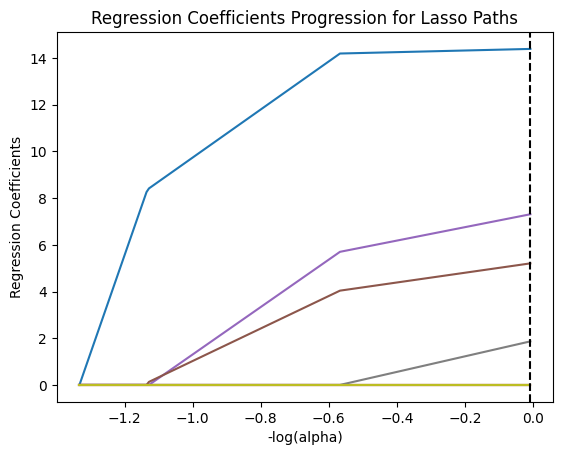

In [30]:
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')
plt.show()

### Plot mean square error for each fold

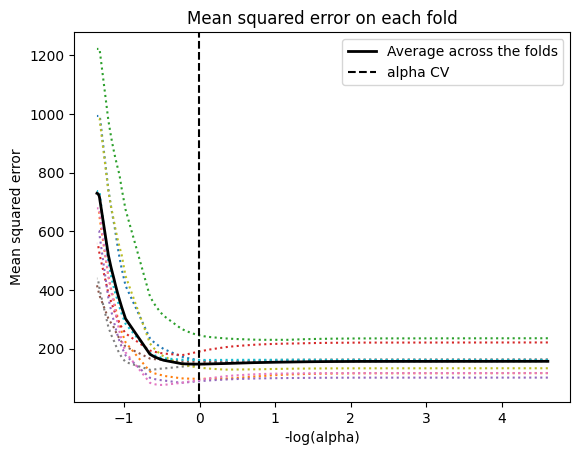

In [35]:
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.mse_path_, ':')
plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k',
label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')
plt.show()

### Print the mean squared error from training and test data

In [36]:
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('')
print ('test data MSE')
print(test_error)

training data MSE
134.31642576057249

test data MSE
184.62071067625732


### Print the r-squared from training and test data

In [37]:
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('')
print ('test data R-square')
print(rsquared_test)

training data R-square
0.813261537652523

test data R-square
0.7062669984091163


## Running a k-means Cluster Analysis

### Perform k-means cluster analysis for 1-9 clusters

In [40]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

clusters = range(1,10)
meandist = []

for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(pred_train)
    clusassign = model.predict(pred_train)
    meandist.append(sum(np.min(cdist(pred_train, model.cluster_centers_, 'euclidean'), axis=1))
    / pred_train.shape[0])

### Plot average distance from observations from the cluster centroid to use the Elbow Method to identify number of clusters to choose

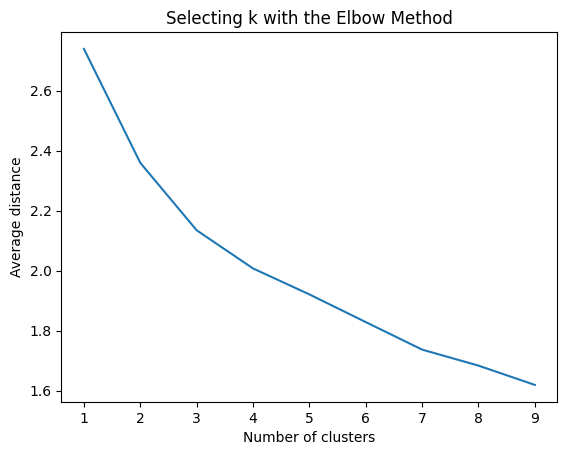

In [41]:
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [42]:
model3 = KMeans(n_clusters=4)
model3.fit(pred_train)
clusassign = model3.predict(pred_train)

### Plot the clusters

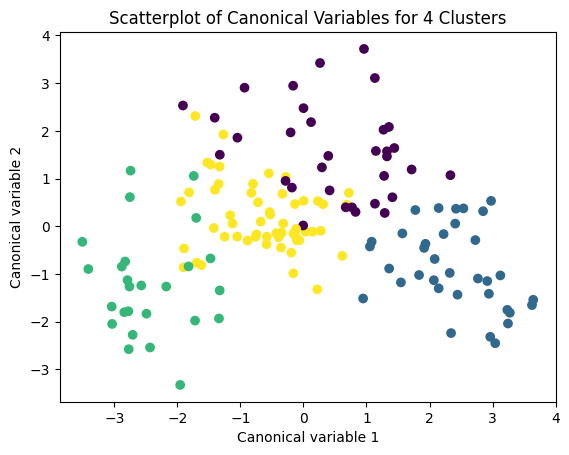

In [44]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plt.figure()
plot_columns = pca_2.fit_transform(pred_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 4 Clusters')
plt.show()

### Begin multiple steps to merge cluster assignment with clustering variables to examine cluster variable means by cluster.

**Create a unique identifier variable from the index for the cluster training data to merge with the cluster assignment variable.**

In [45]:
pred_train.reset_index(level=0, inplace=True)

#### Create a list that has the new index variable



In [46]:
predlist = list(pred_train['index'])

#### Create a list of cluster assignments

In [47]:
labels = list(model3.labels_)

#### Combine index variable list with cluster assignment list into a dictionary

In [49]:
newlist = dict(zip(predlist, labels))
print(newlist)

{41: 1, 172: 1, 85: 2, 81: 0, 93: 3, 100: 2, 77: 3, 82: 0, 88: 0, 149: 1, 8: 3, 161: 3, 79: 1, 147: 3, 36: 1, 63: 2, 28: 1, 13: 2, 122: 0, 90: 2, 140: 0, 44: 3, 152: 3, 169: 3, 196: 0, 60: 1, 7: 3, 30: 1, 190: 1, 177: 1, 141: 0, 29: 1, 35: 1, 0: 0, 144: 2, 45: 0, 158: 3, 40: 1, 59: 3, 157: 3, 46: 3, 136: 2, 104: 3, 5: 3, 16: 3, 154: 3, 182: 0, 65: 3, 202: 2, 178: 0, 74: 3, 110: 3, 61: 3, 208: 1, 38: 1, 27: 3, 54: 3, 143: 3, 156: 2, 121: 3, 194: 3, 175: 3, 151: 3, 87: 0, 9: 2, 6: 3, 167: 2, 180: 0, 209: 0, 150: 1, 67: 1, 3: 2, 86: 0, 145: 0, 48: 2, 117: 3, 51: 0, 1: 3, 18: 3, 12: 2, 189: 1, 56: 0, 25: 3, 101: 2, 43: 0, 129: 3, 103: 1, 14: 1, 134: 3, 115: 1, 212: 1, 70: 1, 171: 3, 15: 3, 146: 0, 22: 1, 138: 3, 58: 1, 162: 3, 75: 3, 64: 2, 69: 2, 206: 0, 131: 1, 168: 1, 76: 3, 34: 3, 155: 2, 94: 2, 118: 0, 97: 1, 102: 0, 92: 2, 124: 3, 99: 1, 105: 0, 135: 1, 176: 1, 200: 3, 186: 0, 210: 0, 39: 3, 84: 3, 2: 0, 55: 0, 49: 3, 68: 3, 203: 2, 164: 0, 78: 1, 207: 3, 153: 3, 111: 2, 174: 3, 32: 

In [57]:
newclus = pd.DataFrame.from_dict(newlist, orient='index')
newclus = newclus.sort_index()
newclus

,0
0,0
1,3
2,0
3,2
5,3
...,...
208,1
209,0
210,0
211,1


#### Rename the cluster assignment column

In [58]:
newclus.columns = ['cluster']

####Repeat previous steps for the cluster assignment variable
Create a unique identifier variable from the index for the cluster assignment dataframe to merge with cluster training data

In [59]:
newclus.reset_index(level=0, inplace=True)

#### Merge the cluster assignment dataframe with the cluster training variable dataframe by the index variable

In [60]:
merged_train = pd.merge(pred_train, newclus, on='index')
merged_train.head(n=100)

,index,incomeperperson,employrate,femaleemployrate,polityscore,alcconsumption,lifeexpectancy,oilperperson,relectricperperson,urbanrate,cluster
0,41,-0.941,0.822,0.236,0.239,-0.726,-2.226,0.000,-1.470,-0.982,1
1,172,-0.917,0.563,1.284,0.605,0.623,-2.226,0.000,0.291,-0.819,1
2,85,1.997,1.622,1.784,-0.001,0.157,1.324,0.000,2.006,1.528,2
3,81,-0.902,-0.291,-0.973,0.239,-0.166,-0.850,0.000,-1.503,-0.428,0
4,93,-0.426,-0.042,0.002,0.971,-0.332,0.367,0.000,-0.950,-0.149,3
...,...,...,...,...,...,...,...,...,...,...,...
95,22,-0.778,1.276,1.139,0.605,-0.197,-0.351,0.000,-1.189,0.379,1
96,138,0.308,0.005,0.006,-0.001,0.005,0.741,0.000,0.291,0.345,3
97,58,-0.937,0.682,0.341,-1.958,-1.114,-0.905,0.000,-1.486,-1.552,1
98,162,-0.197,0.005,0.006,-0.001,1.192,0.534,0.000,0.291,-1.246,3


#### Cluster frequencies

In [61]:
merged_train.cluster.value_counts()

3    55
1    35
0    33
2    26
Name: cluster, dtype: int64

#### Calculate clustering variable means by cluster

In [62]:
clustergrp = merged_train.groupby('cluster').mean()
print("Clustering variable means by cluster")
clustergrp

Clustering variable means by cluster


,index,incomeperperson,employrate,femaleemployrate,polityscore,alcconsumption,lifeexpectancy,oilperperson,relectricperperson,urbanrate
cluster,,,,,,,,,,
0,113.061,-0.522,-0.656,-1.029,-0.232,-0.821,-0.295,-0.260,-0.351,-0.314
1,103.114,-0.794,1.225,1.233,-0.289,-0.511,-1.111,-0.118,-0.599,-1.016
2,89.308,1.738,0.030,0.040,0.294,0.523,1.007,0.687,1.368,1.121
3,97.182,-0.070,-0.306,-0.110,0.434,0.739,0.448,-0.282,-0.027,0.099


**Validate clusters in training data by examining cluster differences in internetuserate using ANOVA. First, merge internetuserate with clustering variables and cluster assignment data**

In [64]:
internetuserate_data = df['internetuserate']

#### Split internetuserate data into train and test sets

In [66]:
internetuserate_train, internetuserate_test = train_test_split(internetuserate_data, test_size=.3, random_state=123)
internetuserate_train1=pd.DataFrame(internetuserate_train)
internetuserate_train1.reset_index(level=0, inplace=True)
merged_train_all=pd.merge(internetuserate_train1, merged_train, on='index')
sub5 = merged_train_all[['internetuserate', 'cluster']]

In [67]:
internetuserate_mod = smf.ols(formula='internetuserate ~ C(cluster)', data=sub5).fit()
internetuserate_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        internetuserate   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     95.28
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           4.06e-34
Time:                        00:08:38   Log-Likelihood:                -620.37
No. Observations:                 149   AIC:                             1249.
Df Residuals:                     145   BIC:                             1261.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.3326      2.746      5.949      0.000      10.906      21.759
C(cluster)[T.1]    -4.4421      3.827     -1.161      0.248     -12.006       3.122
C(cluster)[T.2]    55.2628      4.136     13.362      0.000      47.088      63.437
C(cluster)[T.3]    29.2605      3.473      8.425      0.000      22.396      36.124
==============================================================================
Omnibus:                        3.010   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                2.840
Skew:                           0.338   Prob(JB):                        0.242
Kurtosis:                       2.983   Cond. No.                         5.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Means for internetuserate by cluster

In [68]:
m1= sub5.groupby('cluster').mean()
m1

,internetuserate
cluster,
0,16.333
1,11.890
2,71.595
3,45.593


### Standard deviations for internetuserate by cluster

In [69]:
m2= sub5.groupby('cluster').std()
m2

,internetuserate
cluster,
0,13.517
1,12.007
2,17.308
3,18.172


In [70]:
mc1 = multi.MultiComparison(sub5['internetuserate'], sub5['cluster'])
res1 = mc1.tukeyhsd()
res1.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-4.4421,0.6525,-14.3886,5.5043,False
0,2,55.2628,0.0,44.5133,66.0122,True
0,3,29.2605,0.0,20.2342,38.2867,True
1,2,59.7049,0.0,49.0917,70.3181,True
1,3,33.7026,0.0,24.839,42.5662,True
2,3,-26.0023,0.0,-35.7584,-16.2461,True
